### Change Log for Clothing Recognition (using FeedFoward Neural Networks )


This notebook demenstorates a Feedfoward Neural network with 1 hidden layer. In this notebook there is two types of activiation fucntions used, sigmoid & hyperbolic.
I will train &  test the network using both functions and compare the loss and accuracy in iterations between the two activation fucntions. 
The original notebook preformed classification on the [MNIST data set](https://www.kaggle.com/datasets/hojjatk/mnist-dataset) categorizing handwritten images into 10 distinct categories 0 - 9.

My notebook is using the same techniques for the neural network but training the model on the [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) categorizing the images into 10 catageories. 


#### [1. Understanding the Algorithm](#algorithm-understanding)
- **Objective:** 
 - Get an understanding of the feedfoward neural network, train the network using a images to to achieve a high level of accuracy in classifying images into their respective catageoires. 
 - Train the network to achieve high accuracy in classifying images into their respective categories.


##### [2. Data Understanding](#data-understanding)
- **Dataset Description:**
- The original notebook trains the neural network on MNIST data which as dataset consisiting of handwritted digits 0 - 9 in greyscale images. 
  - The original dataset has 60,000 images for training and 10,000 for testing. 

- **Data Changes:**
  My notebook trains the model on the FashionMNIST dataset. 
  - This data set contains 60,000 training and 10,000 test images. 
  - Images are 28 x 28 greyscale 
  - Each training and test example is assigned to one of the following labels:
      - 0 T-shirt
      - 1 Trouser
      - 2 Pullover
      - 3 Dress
      - 4 Coat
      - 5 Sandal
      - 6 Shirt
      - 7 Sneaker
      - 8 Bag
      - 9 Ankle boot

This dataset was created by the same insitutuon MNIST as an update to the MNIST hand written digits dataset using it as a benchmark to validate their algorithmns. 

##### [3. Data Preparation](#3-data-preparation)

The original digits data set is so similar to our fashion one, we dont have to change how we process the data. 
  1. Dataset is divided into training & testing datasets via a flag in the import. 
  2. The image is transofrmed into 'PyTorch tensors' which are arrays optimized for GPU execution.
      - In the original notebook this is done as the images are imported but I wanted to see what I was dealign with so am transforming them after we view them. 
  3. ADD IN NORMALISATION 
  4. PyTorches DataLoader is used to create iterable data batches for training. 


##### [4. Modeling](#modeling)
- **Changes:**
 - The neural network architechture remains the same for both the digits & fashion dataset. 
 - To explore this FFN further, I increased the learning rate of each epoch by 0.1 to find the optium learning rate for this data and network.
**Implementation Details:**
  1. Defined a Feedforward Neural Network model with one hidden layer and specified activation functions.
  2. Utilized PyTorch's modules for defining the model architecture and loss function.

##### [5. Evaluation](#evaluation)

<div style="display: flex; justify-content: space-around; align-items: center;">
    <img src="images/Sigmoid Activation Function - Loss vs Learning Rate.png" alt="Sigmoid Loss" style="width: 45%;">
    <img src="images/Sigmoid Activation Function - Accuracy vs Learning Rate.png" alt="Sigmoid Accuracy" style="width: 45%;">
</div>

- **Sigmoid Activation Function** Iteration 3000
  - Learning rate 0.1: Loss: 0.54. Accuracy: 82.68%
  - Learning rate 0.2: Loss: 0.43. Accuracy: 84.28%
  - Learning rate 0.3: Loss: 0.49. Accuracy: 84.27%
  - Learning rate 0.4: Loss: 0.51. Accuracy: 85.31%

<div style="display: flex; justify-content: space-around; align-items: center;">
    <img src="images/Hyperbolic Activation Function - Loss vs Learning Rate.png" alt="Hyperbolic Loss" style="width: 45%;">
    <img src="images/Hyperbolic Activation Function - Accuracy vs Learning Rate.png" alt="Hyperbolic Accuracy" style="width: 45%;">
</div>


- **Hyperbolic Activation Function** Iteration 3000
  - Learning rate 0.1: Loss: 0.41. Accuracy: 84.76%
  - Learning rate 0.2: Loss: 0.27. Accuracy: 85.85%
  - Learning rate 0.3: Loss: 0.27. Accuracy: 86.32%
  - Learning rate 0.5: Loss: 0.33. Accuracy: 84.83%



In [60]:
#Imports 
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt


#### Data Understanding <a id='data-understanding'></a>

Here I import the data using the 'torchvision.datasets.FashionMNIST' module from the PyTorch library.
- root: location to store the data
- train: boolean that indicates weather it is the trainign set or not 

In [61]:
train_dataset = dsets.FashionMNIST(root='./data', 
                                   train=True, 
                                   download=True)

test_dataset = dsets.FashionMNIST(root='./data', 
                                  train=False, 
                                  download=True)


Print off some samples of our data so we can see what we are working with

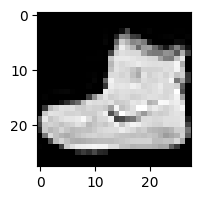

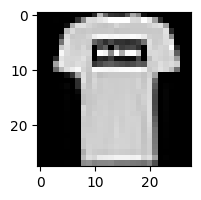

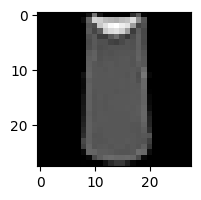

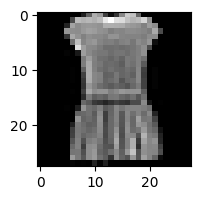

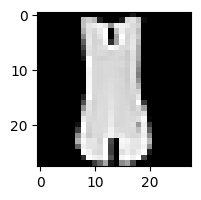

In [62]:
for i in range(5):
    image, label = train_dataset[i]
    plt.figure(figsize=(2, 2))
    plt.imshow(image, cmap='gray')
    plt.show()

Step 1.5: Convert images to 'tensors' represents it as multidementional arrays which is how pytorch and tensor flow process it. 

In [63]:
# Transformation to tensors (og notebook did this on input but i wanted to show the images )
transform = transforms.ToTensor()
train_dataset.transform = transform
test_dataset.transform = transform

Step 2: Make Dataset Iterable:

Here the dataset is split up into smaller chunks, this speeds up processing time over the epochs rather than iterating over the entire dataset. 

In [64]:
#Breaks data set up into batches of 100
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                        batch_size=batch_size, 
                                        shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                        batch_size=batch_size, 
                                        shuffle=False)

Step 3: Create Model Class¶

In [65]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) #defines first fully connected layer 

        # Non-linearity
        self.sigmoid = nn.Sigmoid() #sigmoid activation function 

        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  #Second fully conncted layer 

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x) 

        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)

        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

In [66]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

Step 5: Instantiate Loss Class¶

In [67]:
criterion = nn.CrossEntropyLoss()

Step 6: Instantiate Optimizer Class¶

In [68]:
learning_rate = 0.2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Parameters In-Depth

In [69]:
print(model.parameters())

<generator object Module.parameters at 0x123c92b20>


In [70]:
print(len(list(model.parameters())))

4


In [71]:
# FC 1 Parameters 
print(list(model.parameters())[0].size())

torch.Size([100, 784])


In [72]:
# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

torch.Size([100])


In [73]:
# FC 2 Parameters
print(list(model.parameters())[2].size())

torch.Size([10, 100])


In [74]:
# FC 2 Bias Parameters
print(list(model.parameters())[3].size())

torch.Size([10])


In [75]:
#4
#torch.Size([100, 784])
#torch.Size([100])
#torch.Size([10, 100])
#torch.Size([10])

Step 7: Train Model

In [76]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6642760634422302. Accuracy: 79.94999694824219
Iteration: 1000. Loss: 0.4384138882160187. Accuracy: 81.5
Iteration: 1500. Loss: 0.49174463748931885. Accuracy: 83.54000091552734
Iteration: 2000. Loss: 0.37051326036453247. Accuracy: 84.3499984741211
Iteration: 2500. Loss: 0.546497642993927. Accuracy: 84.87000274658203
Iteration: 3000. Loss: 0.5116098523139954. Accuracy: 85.30999755859375


Steps¶

    Step 1: Load Dataset
    Step 2: Make Dataset Iterable
    Step 3: Create Model Classfdsd
    Step 4: Instantiate Model Class
    Step 5: Instantiate Loss Class
    Step 6: Instantiate Optimizer Class
    Step 7: Train Model


STEP 1: LOADING DATASET

In [77]:
train_dataset = dsets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.FashionMNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

STEP 2: MAKING DATASET ITERABLE

In [78]:


batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

STEP 3: CREATE MODEL CLASS

In [79]:

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.tanh = nn.Tanh()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.tanh(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out


STEP 4: INSTANTIATE MODEL CLASS


In [80]:

input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

STEP 5: INSTANTIATE LOSS CLASS

In [81]:

criterion = nn.CrossEntropyLoss()

STEP 6: INSTANTIATE OPTIMIZER CLASS

In [82]:
learning_rate = 0.3

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

STEP 7: TRAIN THE MODEL

In [83]:

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.5219243764877319. Accuracy: 81.9000015258789
Iteration: 1000. Loss: 0.3091445863246918. Accuracy: 84.13999938964844
Iteration: 1500. Loss: 0.4673795998096466. Accuracy: 83.05000305175781
Iteration: 2000. Loss: 0.27043524384498596. Accuracy: 85.36000061035156
Iteration: 2500. Loss: 0.2788431942462921. Accuracy: 86.58999633789062
Iteration: 3000. Loss: 0.3344079554080963. Accuracy: 84.83000183105469


Sample: 1
Predicted Label: 9
True Label: 9


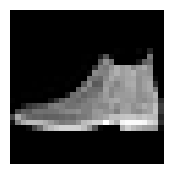


Sample: 2
Predicted Label: 2
True Label: 2


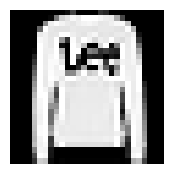


Sample: 3
Predicted Label: 1
True Label: 1


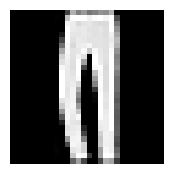


Sample: 4
Predicted Label: 1
True Label: 1


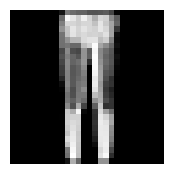


Sample: 5
Predicted Label: 6
True Label: 6


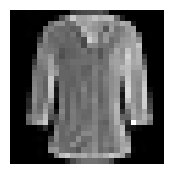


Sample: 6
Predicted Label: 1
True Label: 1


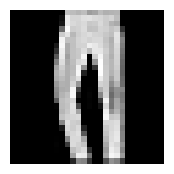


Sample: 7
Predicted Label: 4
True Label: 4


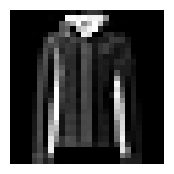


Sample: 8
Predicted Label: 6
True Label: 6


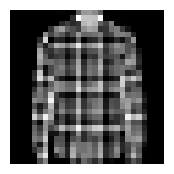


Sample: 9
Predicted Label: 5
True Label: 5


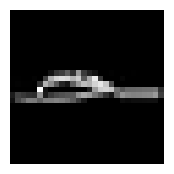


Sample: 10
Predicted Label: 7
True Label: 7


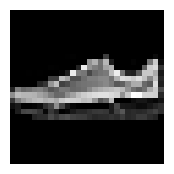

In [84]:
import matplotlib.pyplot as plt

# Set the number of predictions to print
num_predictions = 10

# Loop over the test dataset and print predictions for each image
for i, (images, labels) in enumerate(test_loader):
    # Forward pass to get output/logits
    outputs = model(images.view(-1, 28*28).requires_grad_())
    
    # Get predicted labels
    _, predicted = torch.max(outputs.data, 1)
    
    # Print predictions for each image in the batch
    for j in range(len(labels)):
        print("Sample:", i * batch_size + j + 1)
        print("Predicted Label:", predicted[j].item())
        print("True Label:", labels[j].item())
        
        # Plot the image
        plt.figure(figsize=(2, 2))  # Set the figure size (width, height) in inches
        plt.imshow(images[j].view(28, 28), cmap='gray')
        plt.axis('off')
        plt.show()
        
        print()
        
        # Break the loop if the desired number of predictions is reached
        if (i * batch_size + j + 1) == num_predictions:
            break
    
    # Break the loop if the desired number of predictions is reached
    if (i + 1) * batch_size >= num_predictions:
        break


### 5. Evaluation <a id='evaluation'></a>

Below are the outputs for the Sigmoid and Hyperbolic Activiation functions.
I have increased the learning rate .1 for each iteration to compare the Loss and Accuracy Learning curve.
We can determine that 
 - Sigmoid: Learning rate 0.2 has the lowest Loss and highest Accuracy resutls
 - Hyperbolic: Learning rate .3 has the lowest Loss and highest Accuracy resutls


Based on the comparison, we see that the Hyperbolic Activation Function with a learning rate of 0.3 performs better in terms of accuracy compared to the Sigmoid Activation Function with a learning rate of 0.2.


### Sigmoid Activation Function

#### Learning rate 0.1
- Iteration 500: Loss = 0.7098, Accuracy = 72.74%
- Iteration 1000: Loss = 0.6499, Accuracy = 77.41%
- Iteration 1500: Loss = 0.5517, Accuracy = 79.85%
- Iteration 2000: Loss = 0.4934, Accuracy = 81.18%
- Iteration 2500: Loss = 0.5053, Accuracy = 81.75%
- Iteration 3000: Loss = 0.5375, Accuracy = 82.68%

#### Learning rate 0.2
- Iteration 500: Loss = 0.5842, Accuracy = 77.17%
- Iteration 1000: Loss = 0.5057, Accuracy = 80.68%
- Iteration 1500: Loss = 0.6082, Accuracy = 82.20%
- Iteration 2000: Loss = 0.2899, Accuracy = 82.98%
- Iteration 2500: Loss = 0.4461, Accuracy = 83.07%
- Iteration 3000: Loss = 0.4284, Accuracy = 84.28%

#### Learning rate 0.3
- Iteration 500: Loss = 0.5282, Accuracy = 79.73%
- Iteration 1000: Loss = 0.4649, Accuracy = 82.69%
- Iteration 1500: Loss = 0.4766, Accuracy = 83.11%
- Iteration 2000: Loss = 0.4515, Accuracy = 82.89%
- Iteration 2500: Loss = 0.5382, Accuracy = 83.08%
- Iteration 3000: Loss = 0.4857, Accuracy = 84.27%

#### Learning rate 0.4
- Iteration 500: Loss = 0.6643, Accuracy = 79.95%
- Iteration 1000: Loss = 0.4384, Accuracy = 81.50%
- Iteration 1500: Loss = 0.4917, Accuracy = 83.54%
- Iteration 2000: Loss = 0.3705, Accuracy = 84.35%
- Iteration 2500: Loss = 0.5465, Accuracy = 84.87%
- Iteration 3000: Loss = 0.5116, Accuracy = 85.31%

### Hyperbolic Activation Function

#### Learning rate 0.1
- Iteration 500: Loss = 0.6437, Accuracy = 81.31%
- Iteration 1000: Loss = 0.3577, Accuracy = 83.02%
- Iteration 1500: Loss = 0.4512, Accuracy = 83.83%
- Iteration 2000: Loss = 0.3460, Accuracy = 82.35%
- Iteration 2500: Loss = 0.4050, Accuracy = 84.76%
- Iteration 3000: Loss = 0.4071, Accuracy = 84.76%

#### Learning rate 0.2
- Iteration 500: Loss = 0.5485, Accuracy = 82.37%
- Iteration 1000: Loss = 0.2826, Accuracy = 84.12%
- Iteration 1500: Loss = 0.4048, Accuracy = 84.02%
- Iteration 2000: Loss = 0.2884, Accuracy = 85.72%
- Iteration 2500: Loss = 0.3637, Accuracy = 85.68%
- Iteration 3000: Loss = 0.2655, Accuracy = 85.85%

#### Learning rate 0.3
- Iteration 500: Loss = 0.3783, Accuracy = 81.96%
- Iteration 1000: Loss = 0.4422, Accuracy = 82.66%
- Iteration 1500: Loss = 0.2643, Accuracy = 85.18%
- Iteration 2000: Loss = 0.3354, Accuracy = 85.87%
- Iteration 2500: Loss = 0.2668, Accuracy = 85.96%
- Iteration 3000: Loss = 0.2656, Accuracy = 86.32%

#### Learning rate 0.4
- Iteration 500: Loss = 0.5219, Accuracy = 81.90%
- Iteration 1000: Loss = 0.3091, Accuracy = 84.14%
- Iteration 1500: Loss = 0.4674, Accuracy = 83.05%
- Iteration 2000: Loss = 0.2704, Accuracy = 85.36%
- Iteration 2500: Loss = 0.2788, Accuracy = 86.59%
- Iteration 3000: Loss = 0.3344, Accuracy = 84.83%

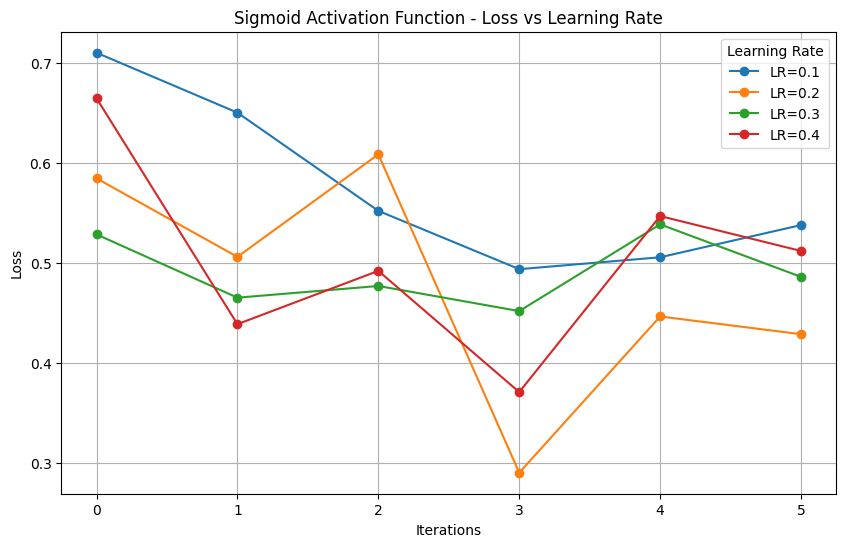

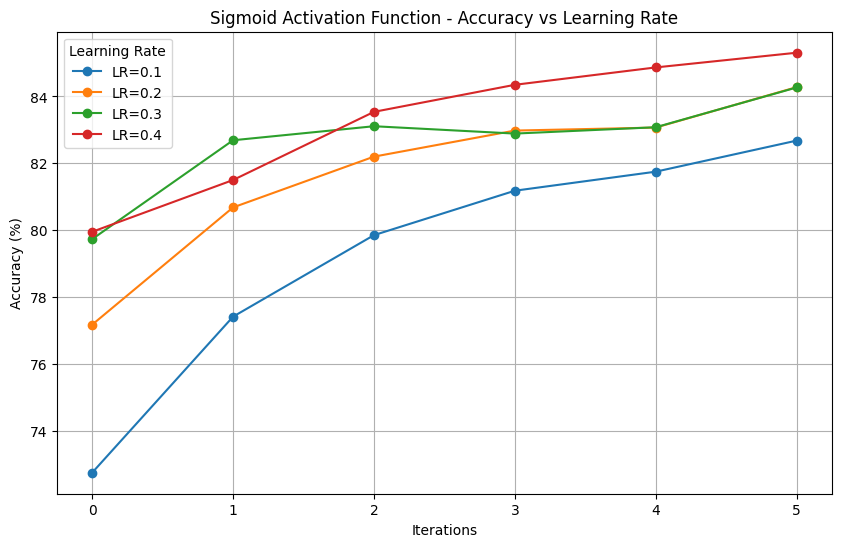

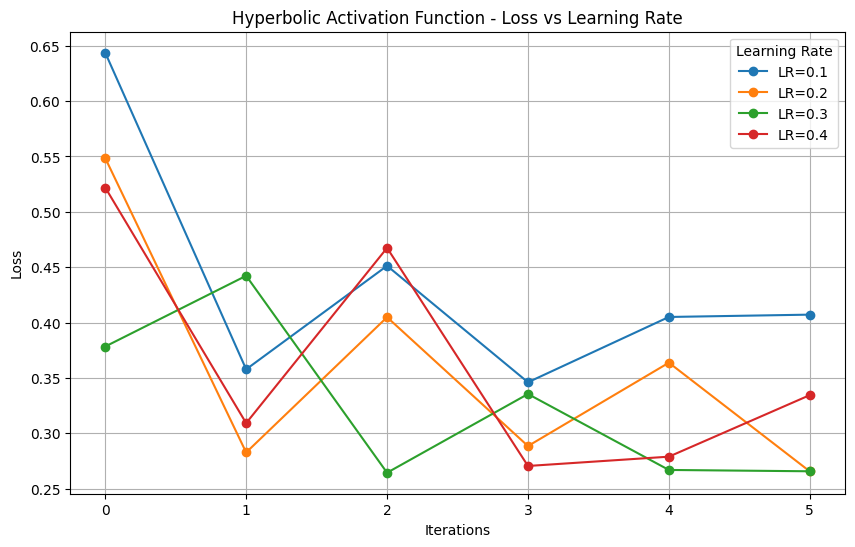

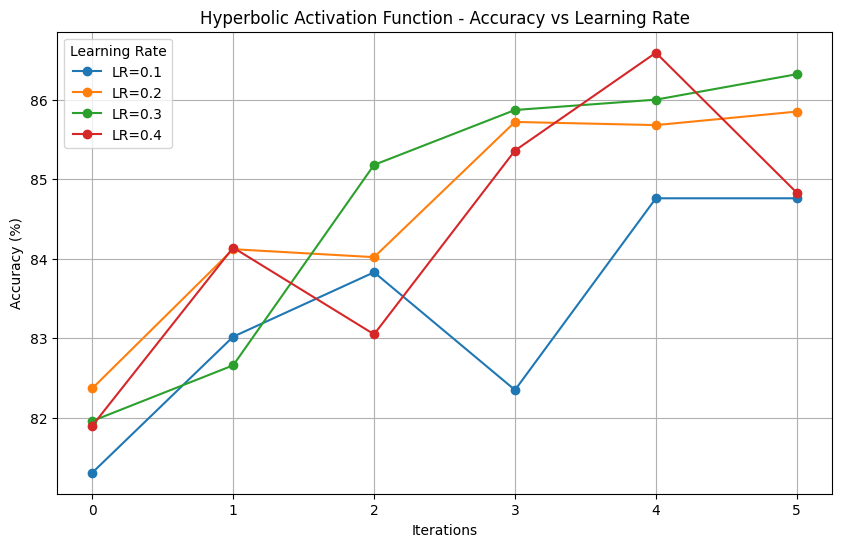

In [85]:

# Define the data for sigmoid activation function
sigmoid_learning_rates = [0.1, 0.2, 0.3, 0.4]


# Plot sigmoid loss
plt.figure(figsize=(10, 6))
for i, (lr, loss) in enumerate(zip(sigmoid_learning_rates, sigmoid_loss)):
    plt.plot(loss, label=f"LR={lr}", marker='o')
plt.title('Sigmoid Activation Function - Loss vs Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(title='Learning Rate')
plt.grid(True)
plt.show()

# Plot sigmoid accuracy
plt.figure(figsize=(10, 6))
for i, (lr, acc) in enumerate(zip(sigmoid_learning_rates, sigmoid_accuracy)):
    plt.plot(acc, label=f"LR={lr}", marker='o')
plt.title('Sigmoid Activation Function - Accuracy vs Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend(title='Learning Rate')
plt.grid(True)
plt.show()

# Plot hyperbolic loss
plt.figure(figsize=(10, 6))
for i, (lr, loss) in enumerate(zip(hyperbolic_learning_rates, hyperbolic_loss)):
    plt.plot(loss, label=f"LR={lr}", marker='o')
plt.title('Hyperbolic Activation Function - Loss vs Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(title='Learning Rate')
plt.grid(True)
plt.show()

# Plot hyperbolic accuracy
plt.figure(figsize=(10, 6))
for i, (lr, acc) in enumerate(zip(hyperbolic_learning_rates, hyperbolic_accuracy)):
    plt.plot(acc, label=f"LR={lr}", marker='o')
plt.title('Hyperbolic Activation Function - Accuracy vs Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend(title='Learning Rate')
plt.grid(True)
plt.show()
